# SpaCy

NLTK: 
 - every possible technique
 - better for learning
 - no load time, no parse time
 - parsing happens on-demand
 
SpaCy:
 - opinionated
 - usually only one way to do something
 - faster (once it's loaded), more accurate
 - does all parsing at once

In [99]:
import spacy
from collections import Counter
import pandas as pd

In [3]:
nlp = spacy.load('en_core_web_lg')

In [4]:
dubliners = open('../Readings/content/texts/dubliners.md').read()

In [5]:
dublinersParts = dubliners.split('\n## ')

In [7]:
sisters = dublinersParts[1]

In [9]:
sistersDoc = nlp(sisters)

In [11]:
type(sistersDoc)

spacy.tokens.doc.Doc

In [14]:
dir(sistersDoc)

['_',
 '__bytes__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__ne__',
 '__new__',
 '__pyx_vtable__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 '_bulk_merge',
 '_py_tokens',
 '_realloc',
 '_vector',
 '_vector_norm',
 'cats',
 'char_span',
 'count_by',
 'doc',
 'ents',
 'extend_tensor',
 'from_array',
 'from_bytes',
 'from_disk',
 'get_extension',
 'get_lca_matrix',
 'has_extension',
 'has_vector',
 'is_nered',
 'is_parsed',
 'is_sentenced',
 'is_tagged',
 'lang',
 'lang_',
 'mem',
 'merge',
 'noun_chunks',
 'noun_chunks_iterator',
 'print_tree',
 'remove_extension',
 'retokenize',
 'sentiment',
 'sents',
 'set_extension',
 'similarity',
 'tensor',
 'text',
 'text_with_ws',
 'to_array',
 'to_byte

In [16]:
len(sistersDoc)

3958

In [20]:
lighted = sistersDoc[51]

In [22]:
type(lighted)

spacy.tokens.token.Token

In [24]:
sistersDoc.sents

## Generators

Generators are like "lazy" lists
 - it's not a list by default
 - but you can iterate over it
 - you can use `next()` function to get the next one
 - you can also force it into a list with `list()`

In [28]:
list(sistersDoc.sents)[6]

I knew
that two candles must be set at the head of a corpse.

In [31]:
for sent in sistersDoc.sents: 
    print(sent)
    break

THE SISTERS




# Named Entity Recognition (NER)

Probabilistic means of detecting so-called named entities (people, organizations, artworks): things that have names. 

 - cardinal numbers, ordinal numbers, currency (prices)
 - dates, places

In [48]:
for ent in sistersDoc.ents: 
    print(ent, ent.label_)

third ORDINAL
Night
 PERSON
night TIME
two CARDINAL
Every night TIME
Euclid ORG
Catechism WORK_OF_ART
Cotter PERSON
I.

 PERSON
Flynn PERSON
Cotter PERSON
Cotter PERSON
Cotter PERSON
Cotter PERSON
Cotter PERSON
Jack PERSON
Rosicrucian PERSON
every morning TIME
winter DATE
summer DATE
Education ORG
Cotter PERSON
Cotter PERSON
Cotter PERSON
Cotter PERSON
Cotter PERSON
Christmas DATE
The next morning TIME
Great Britain GPE
ordinary days DATE
Two CARDINAL
July 1st DATE
1895 DATE
James Flynn PERSON
S.
 PERSON
Church ORG
Meath Street FAC
sixty-five years DATE
R. I. P. .... PERSON
doze PERSON
half CARDINAL
a week DATE
the day DATE
the night TIME
Irish NORP
Rome GPE
Latin NORP
Napoleon Bonaparte PERSON
Mass PERSON
Church ORG
Eucharist ORG
the
Church ORG
the Post Office Directory ORG
thrice DATE
Mass PERSON
Cotter PERSON
Persia LOC
Nannie
 PERSON
first ORDINAL
Nannie PERSON
three CARDINAL
one CARDINAL
Eliza PERSON
Nannie PERSON
Eliza PERSON
Eliza PERSON
Eliza PERSON
O'Rourke PERSON
Tuesday DATE

In [50]:
sistersPeople = [ent for ent in sistersDoc.ents if ent.label_ == 'PERSON']

In [56]:
Counter(sistersPeople).most_common(10)

[(Night, 1),
 (Cotter, 1),
 (I.
  , 1),
 (Flynn, 1),
 (Cotter, 1),
 (Cotter, 1),
 (Cotter, 1),
 (Cotter, 1),
 (Cotter, 1),
 (Jack, 1)]

In [58]:
sistersPeople[4]

Cotter

In [59]:
sistersPeople[5]

Cotter

In [60]:
sistersPeople[4] == sistersPeople[5]

False

In [61]:
"Cotter" == "Cotter"

True

In [66]:
sistersPeople[4].text, sistersPeople[4].string

('Cotter', 'Cotter ')

In [67]:
sistersPeople[4].text == sistersPeople[5].text

True

In [70]:
Counter([person.text.strip() for person in sistersPeople]).most_common(10)

[('Eliza', 13),
 ('Cotter', 12),
 ('Nannie', 6),
 ('James', 6),
 ("O'Rourke", 3),
 ('Flynn', 2),
 ('Mass', 2),
 ('Night', 1),
 ('I.', 1),
 ('Jack', 1)]

In [71]:
sistersTimes = [ent for ent in sistersDoc.ents if ent.label_ == 'TIME']

In [74]:
sistersPeople[4].label_

'PERSON'

In [75]:
sistersPeople[4].label

380

In [76]:
%timeit sistersPeople[4].label_ == sistersPeople[5].label_

1.02 µs ± 200 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [77]:
%timeit sistersPeople[4].label == sistersPeople[5].label

607 ns ± 79.8 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [78]:
sistersTimes

[night,
 Every night,
 every morning,
 The next morning,
 the night,
 evening,
 one night]

In [80]:
[ent for ent in sistersDoc.ents if ent.label_ == 'GPE' or ent.label_ == 'LOC']

[Great Britain, Rome, Persia, Mass]

## POS Tagging in SpaCy

- pos_ = restricted set (noun, verb, adjective) 
- tag_ = Penn Treebank set

In [82]:
for token in sistersDoc[:200]: 
    print(token, token.pos_, token.tag_)

THE DET DT
SISTERS NOUN NNS


 SPACE _SP
THERE PRON EX
was AUX VBD
no DET DT
hope NOUN NN
for ADP IN
him PRON PRP
this DET DT
time NOUN NN
: PUNCT :
it PRON PRP
was AUX VBD
the DET DT
third ADJ JJ
stroke NOUN NN
. PUNCT .
Night NOUN NN

 SPACE _SP
after ADP IN
night NOUN NN
I PRON PRP
had AUX VBD
passed VERB VBN
the DET DT
house NOUN NN
( PUNCT -LRB-
it PRON PRP
was AUX VBD
vacation NOUN NN
time NOUN NN
) PUNCT -RRB-
and CCONJ CC
studied VERB VBD

 SPACE _SP
the DET DT
lighted VERB VBN
square NOUN NN
of ADP IN
window NOUN NN
: PUNCT :
and CCONJ CC
night NOUN NN
after ADP IN
night NOUN NN
I PRON PRP
had AUX VBD
found VERB VBN
it PRON PRP

 SPACE _SP
lighted VERB VBN
in ADP IN
the DET DT
same ADJ JJ
way NOUN NN
, PUNCT ,
faintly ADV RB
and CCONJ CC
evenly ADV RB
. PUNCT .
If SCONJ IN
he PRON PRP
was AUX VBD
dead ADJ JJ
, PUNCT ,
I PRON PRP
thought VERB VBD
, PUNCT ,

 SPACE _SP
I PRON PRP
would VERB MD
see VERB VB
the DET DT
reflection NOUN NN
of ADP IN
candles NOUN NNS
on ADP IN
the DET

In [83]:
sistersVerbs = [token for token in sistersDoc if token.pos_ == 'VERB']

In [85]:
[(token, token.tag_) for token in sistersVerbs]

[(passed, 'VBN'),
 (studied, 'VBD'),
 (lighted, 'VBN'),
 (found, 'VBN'),
 (lighted, 'VBN'),
 (thought, 'VBD'),
 (would, 'MD'),
 (see, 'VB'),
 (darkened, 'VBN'),
 (knew, 'VBD'),
 (must, 'MD'),
 (set, 'VBN'),
 (said, 'VBN'),
 (thought, 'VBN'),
 (knew, 'VBD'),
 (gazed, 'VBD'),
 (said, 'VBD'),
 (sounded, 'VBN'),
 (sounded, 'VBD'),
 (filled, 'VBD'),
 (longed, 'VBD'),
 (look, 'VB'),
 (sitting, 'VBG'),
 (came, 'VBD'),
 (ladling, 'VBG'),
 (said, 'VBD'),
 (returning, 'VBG'),
 (would, 'MD'),
 (say, 'VB'),
 ('ll, 'MD'),
 (tell, 'VB'),
 (began, 'VBD'),
 (puff, 'VB'),
 (arranging, 'VBG'),
 (knew, 'VBD'),
 (used, 'VBD'),
 (talking, 'VBG'),
 (grew, 'VBD'),
 (said, 'VBD'),
 (think, 'VBP'),
 (say, 'VB'),
 (began, 'VBD'),
 (puff, 'VB'),
 (giving, 'VBG'),
 (saw, 'VBD'),
 (staring, 'VBG'),
 (said, 'VBD'),
 (gone, 'VBN'),
 ('ll, 'MD'),
 (hear, 'VB'),
 (said, 'VBD'),
 (told, 'VBN'),
 (passing, 'VBG'),
 (knew, 'VBD'),
 (continued, 'VBD'),
 (eating, 'VBG'),
 (interested, 'VBN'),
 (explained, 'VBD'),
 (taught,

In [87]:
[(token.text, token.lemma_, token.tag_) for token in sistersVerbs]

[('passed', 'pass', 'VBN'),
 ('studied', 'study', 'VBD'),
 ('lighted', 'light', 'VBN'),
 ('found', 'find', 'VBN'),
 ('lighted', 'light', 'VBN'),
 ('thought', 'think', 'VBD'),
 ('would', 'would', 'MD'),
 ('see', 'see', 'VB'),
 ('darkened', 'darken', 'VBN'),
 ('knew', 'know', 'VBD'),
 ('must', 'must', 'MD'),
 ('set', 'set', 'VBN'),
 ('said', 'say', 'VBN'),
 ('thought', 'think', 'VBN'),
 ('knew', 'know', 'VBD'),
 ('gazed', 'gaze', 'VBD'),
 ('said', 'say', 'VBD'),
 ('sounded', 'sound', 'VBN'),
 ('sounded', 'sound', 'VBD'),
 ('filled', 'fill', 'VBD'),
 ('longed', 'long', 'VBD'),
 ('look', 'look', 'VB'),
 ('sitting', 'sit', 'VBG'),
 ('came', 'come', 'VBD'),
 ('ladling', 'ladle', 'VBG'),
 ('said', 'say', 'VBD'),
 ('returning', 'return', 'VBG'),
 ('would', 'would', 'MD'),
 ('say', 'say', 'VB'),
 ("'ll", 'will', 'MD'),
 ('tell', 'tell', 'VB'),
 ('began', 'begin', 'VBD'),
 ('puff', 'puff', 'VB'),
 ('arranging', 'arrange', 'VBG'),
 ('knew', 'know', 'VBD'),
 ('used', 'use', 'VBD'),
 ('talking', 't

In [88]:
Counter([token.lemma_ for token in sistersVerbs]).most_common(20)

[('say', 48),
 ('would', 17),
 ('go', 17),
 ('know', 13),
 ('look', 13),
 ('see', 12),
 ('think', 11),
 ('could', 10),
 ('find', 9),
 ('take', 9),
 ('smile', 7),
 ('make', 7),
 ('tell', 6),
 ('begin', 6),
 ('use', 6),
 ('feel', 6),
 ('bring', 6),
 ('will', 5),
 ('give', 5),
 ('fall', 5)]

In [90]:
encounter = dublinersParts[2]

In [91]:
encounterDoc = nlp(encounter)

In [101]:
def getCommonVerbs(doc):
    verbs = []
    for word in doc: 
        if word.pos_ == 'VERB': 
            verbs.append(word.lemma_)
    return dict(Counter(verbs).most_common(20))

In [102]:
storiesVerbs = {'encounter': getCommonVerbs(encounterDoc),
                'sisters': getCommonVerbs(sistersDoc)}

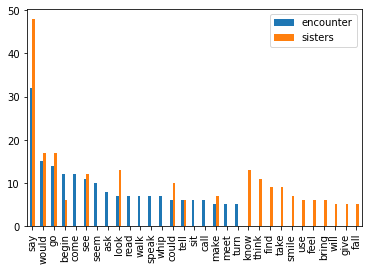

In [105]:
pd.DataFrame(storiesVerbs).fillna(0).plot(kind='bar')